# **Case Study 3**

# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Reading the Dataset**

In [2]:
df = pd.read_csv("Wholesale customers data.csv")

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


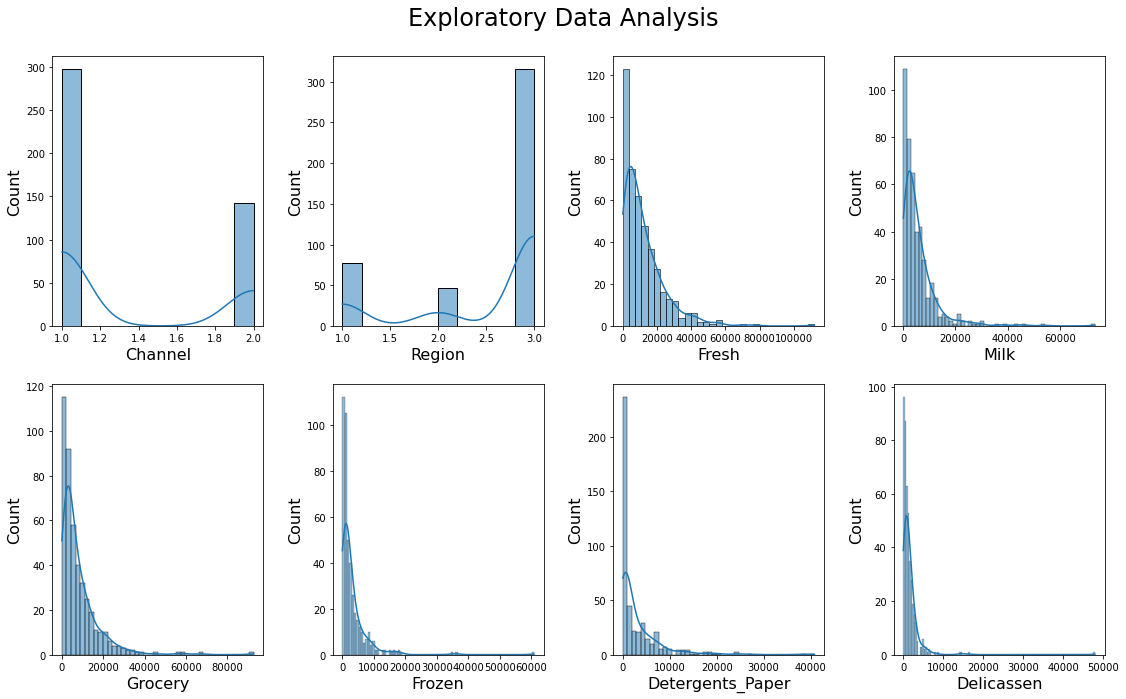

In [35]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(16,10))
ax = ax.flatten()
for i, col in enumerate(df.columns):
    sns.histplot(data=df[col], ax=ax[i], kde=True)
    ax[i].set_xlabel(col, fontsize=16)
    ax[i].set_ylabel("Count", fontsize=16)
plt.suptitle("Exploratory Data Analysis", fontsize=24)
plt.tight_layout(pad=2)
plt.show()

# **Data Pre-processing**

## **Null Value Handling**

In [36]:
df.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

There are no null values in the dataset.

The features Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen contains outliers.

## **Outlier Handling**

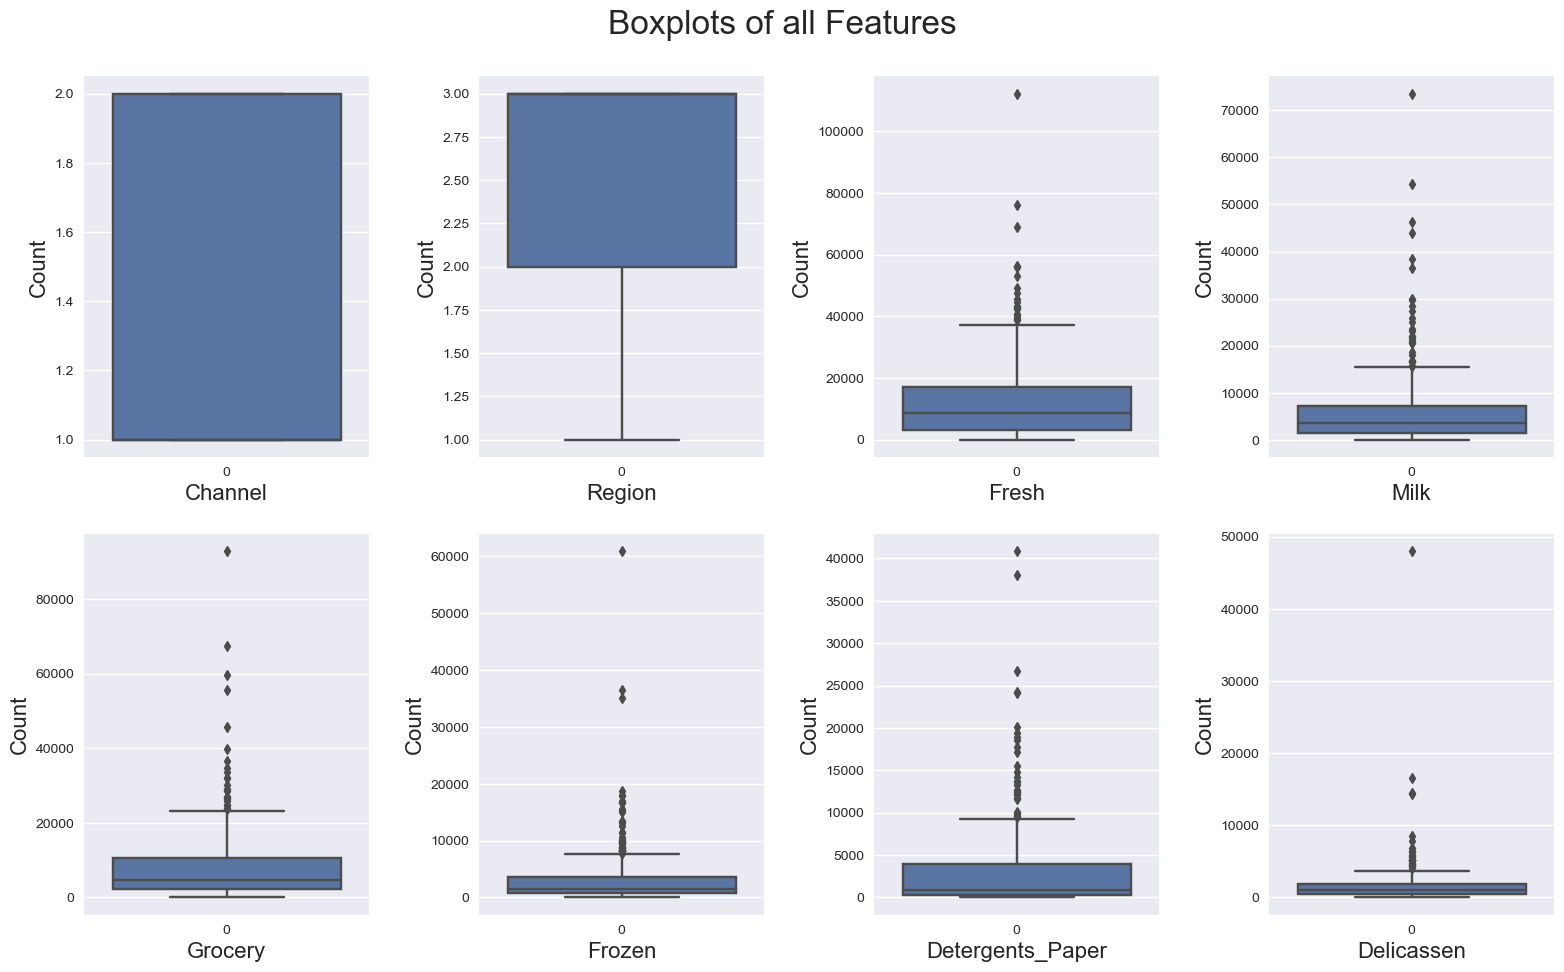

In [100]:
plt.style.use("seaborn")
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(16,10))
ax = ax.flatten()
for i, col in enumerate(df.columns):
    sns.boxplot(data=df[col], ax=ax[i])
    ax[i].set_xlabel(col, fontsize=16)
    ax[i].set_ylabel("Count", fontsize=16)
plt.suptitle("Boxplots of all Features", fontsize=24)
plt.tight_layout(pad=2)
plt.show()

In [77]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [78]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [79]:
outlier_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

### **Log Transformation**

In [80]:
df1 = df.copy()

In [81]:
df1[outlier_cols] = np.log(df1[outlier_cols].values)

In [82]:
df[outlier_cols].head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [84]:
df1[outlier_cols].head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


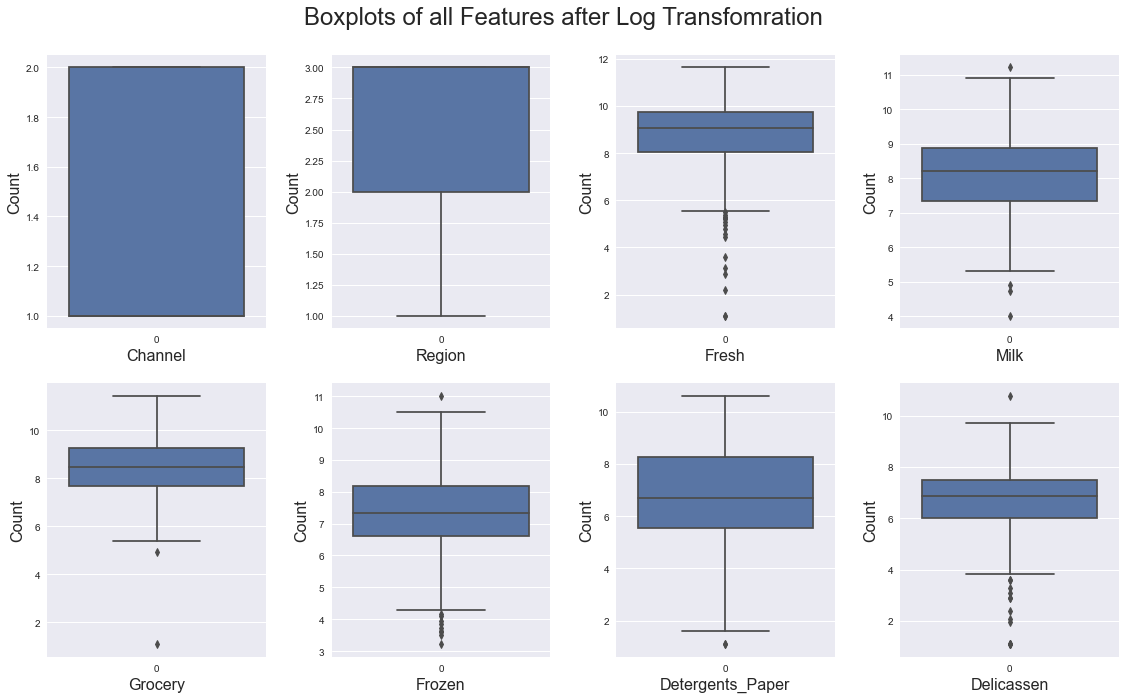

In [85]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(16,10))
ax = ax.flatten()
for i, col in enumerate(df.columns):
    sns.boxplot(data=df1[col], ax=ax[i])
    ax[i].set_xlabel(col, fontsize=16)
    ax[i].set_ylabel("Count", fontsize=16)
plt.suptitle("Boxplots of all Features after Log Transfomration", fontsize=24)
plt.tight_layout(pad=2)
plt.show()

### **Cube Root Transformation**

In [87]:
df2 = df.copy()

In [88]:
df2[outlier_cols] = df2[outlier_cols] ** (1/3)

In [89]:
df[outlier_cols].head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [90]:
df2[outlier_cols].head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,23.312067,21.294417,19.627263,5.981424,13.879925,11.019250
1,19.181094,21.407026,21.229530,12.078193,14.877521,12.110098
2,18.520795,20.651857,19.733121,13.397950,15.206046,19.869146
3,23.672044,10.614765,16.161132,18.570223,7.973873,12.137312
4,28.279097,17.554929,19.308000,15.760764,12.112370,17.308108


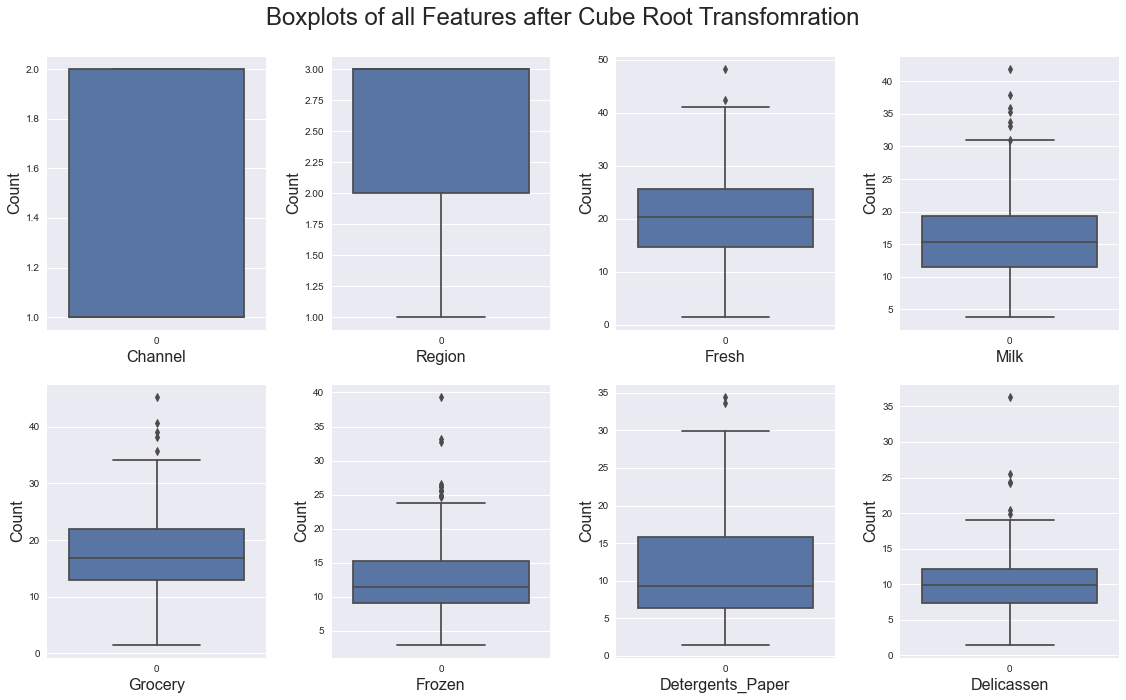

In [91]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(16,10))
ax = ax.flatten()
for i, col in enumerate(df.columns):
    sns.boxplot(data=df2[col], ax=ax[i])
    ax[i].set_xlabel(col, fontsize=16)
    ax[i].set_ylabel("Count", fontsize=16)
plt.suptitle("Boxplots of all Features after Cube Root Transfomration", fontsize=24)
plt.tight_layout(pad=2)
plt.show()

### **Robust Tranformation**

In [92]:
from sklearn.preprocessing import RobustScaler

In [93]:
df3 = df.copy()

In [94]:
robust = RobustScaler()
df3[outlier_cols] = robust.fit_transform(df3[outlier_cols])

In [95]:
df[outlier_cols].head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [96]:
df3[outlier_cols].head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.301680,1.065712,0.329952,-0.466572,0.506787,0.263810
1,-0.104810,1.092934,0.565993,0.083926,0.675670,0.574008
2,-0.155802,0.915816,0.344418,0.312589,0.736512,4.871459
3,0.344850,-0.429714,-0.062862,1.734708,-0.084442,0.582507
4,1.022092,0.315171,0.287260,0.849573,0.262056,2.988314


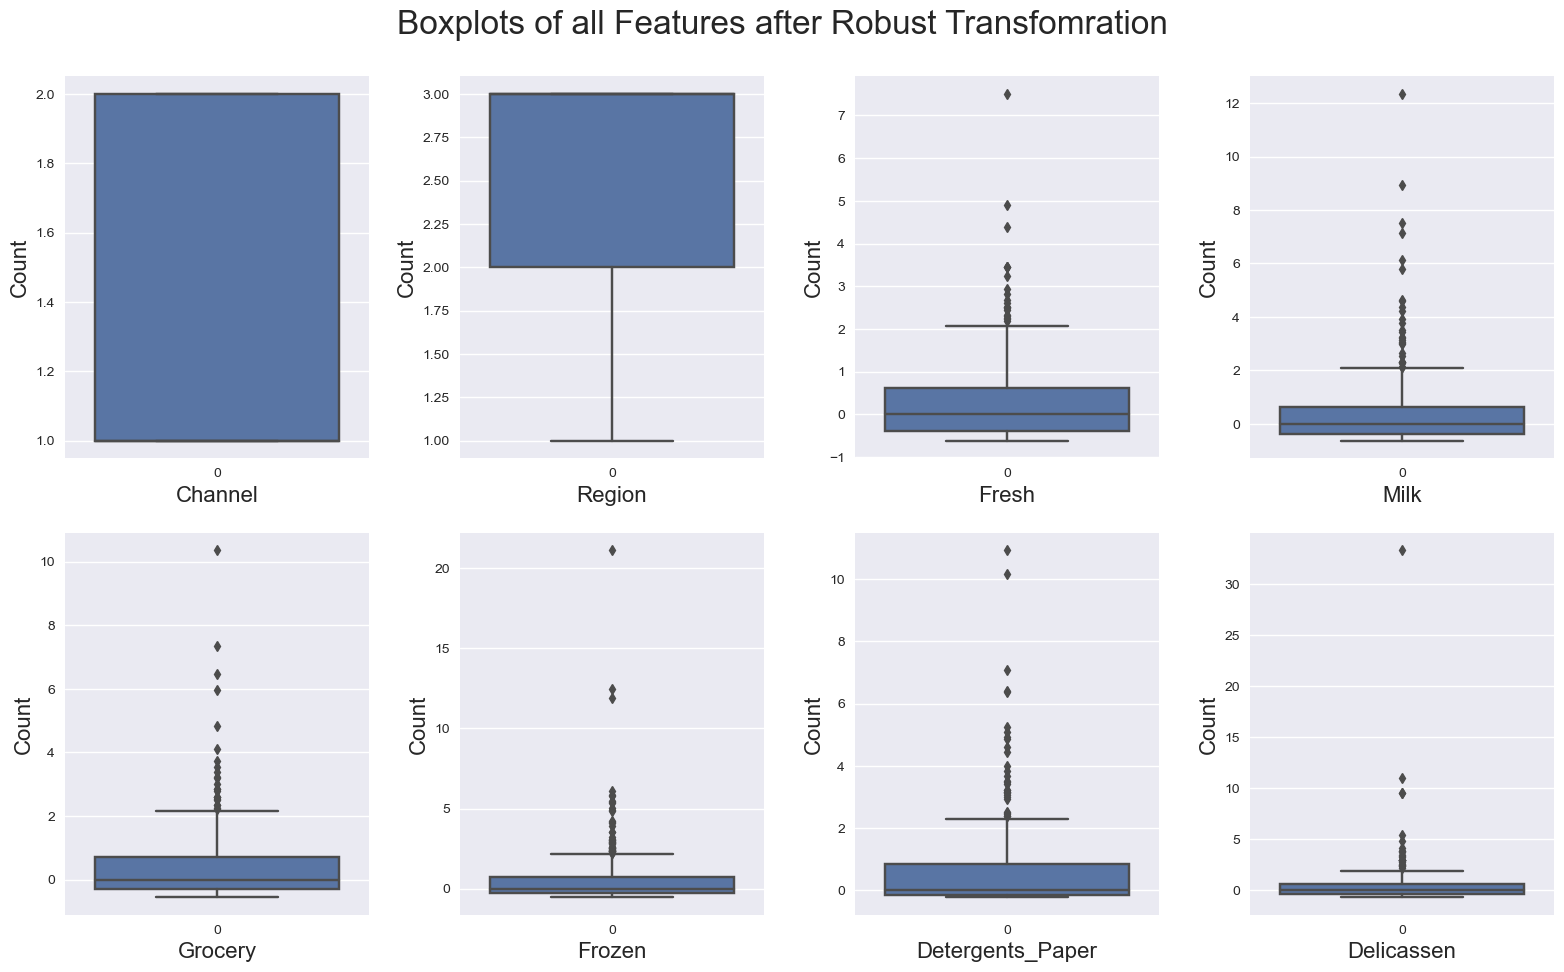

In [101]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(16,10))
ax = ax.flatten()
for i, col in enumerate(df.columns):
    sns.boxplot(data=df3[col], ax=ax[i])
    ax[i].set_xlabel(col, fontsize=16)
    ax[i].set_ylabel("Count", fontsize=16)
plt.suptitle("Boxplots of all Features after Robust Transfomration", fontsize=24)
plt.tight_layout(pad=2)
plt.show()

Selecting the cube root tranformation as the outlier handling method here, it has reduced the outliers to some extend compared to the other tranformation methods.

In [102]:
df = df2

## **Scaling**

In [103]:
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler

In [104]:
X = df.values
X.shape

(440, 8)

In [105]:
# standardization
#scaler = StandardScaler()
#X = scaler.fit_transform(X)

In [106]:
# nomralization
#normalize = Normalizer()
#X = normalize.fit_transform(X)

In [107]:
# MinMax Normalization
minmax = MinMaxScaler()
X = minmax.fit_transform(X)

In [108]:
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.322727,0.771591,0.401728,0.319252,0.372903,0.261357,0.295996,0.245913
std,0.468052,0.387136,0.166328,0.150200,0.144416,0.142726,0.186602,0.111521
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.281776,0.202901,0.261710,0.168352,0.148934,0.171305
50%,0.000000,1.000000,0.405479,0.303568,0.350779,0.235875,0.239587,0.241973
75%,1.000000,1.000000,0.518084,0.406932,0.469171,0.338809,0.434291,0.308653
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


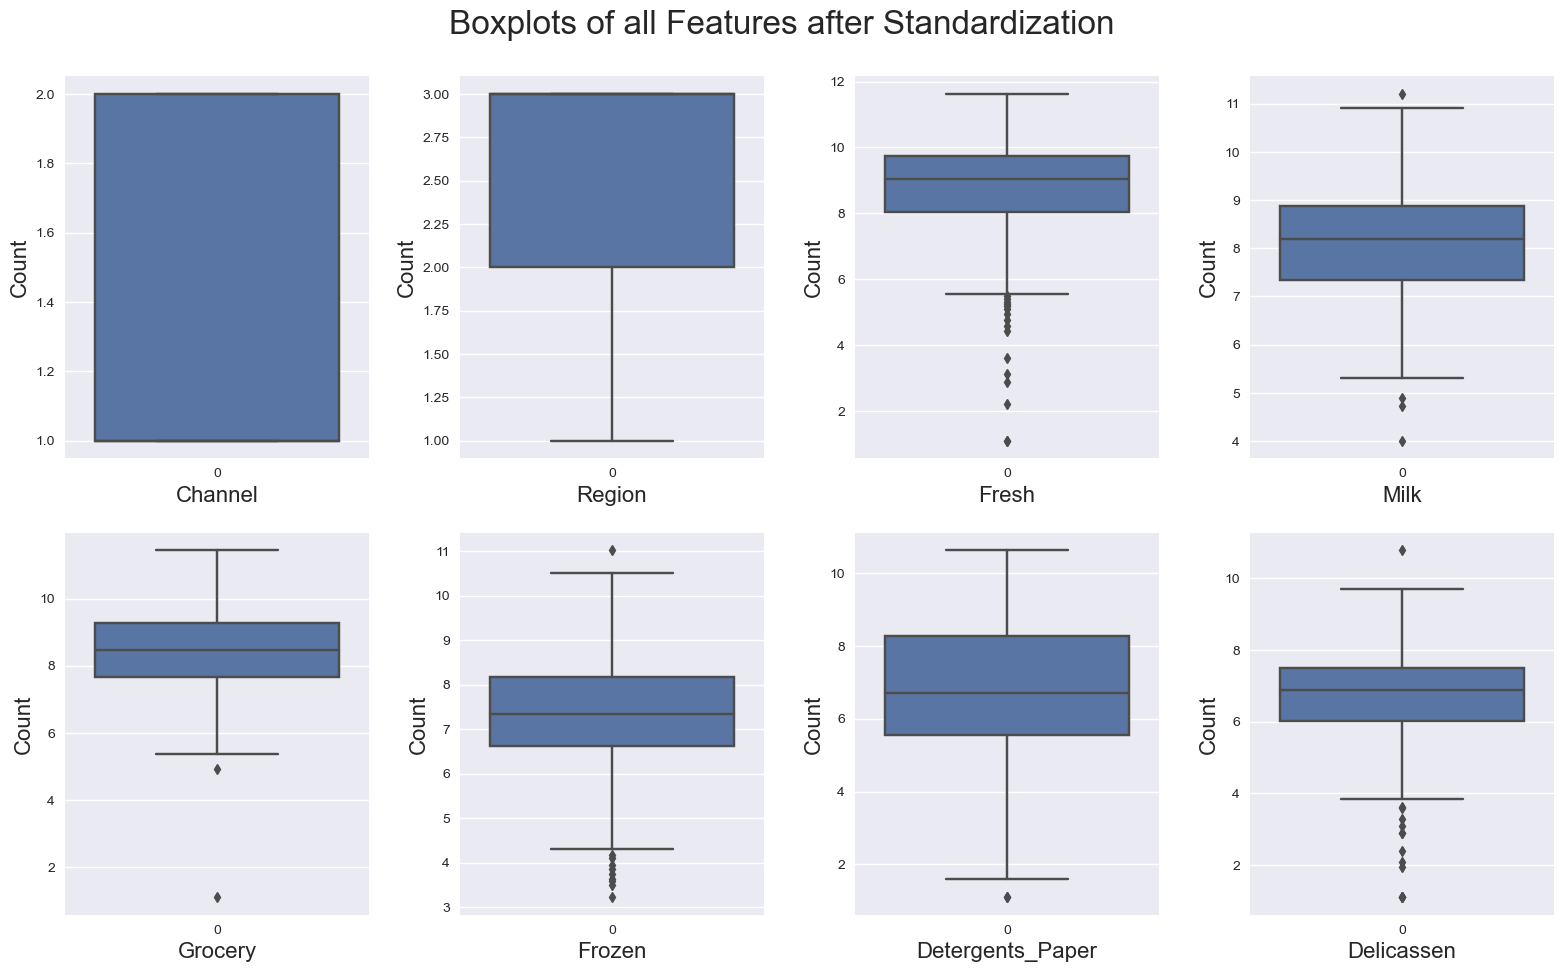

In [109]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(16,10))
ax = ax.flatten()
for i, col in enumerate(df.columns):
    sns.boxplot(data=df1[col], ax=ax[i])
    ax[i].set_xlabel(col, fontsize=16)
    ax[i].set_ylabel("Count", fontsize=16)
plt.suptitle("Boxplots of all Features after Standardization", fontsize=24)
plt.tight_layout(pad=2)
plt.show()

# **KMeans Clustering**

In [110]:
from sklearn.cluster import KMeans

## **Elbow Method**

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


1 Clusters : 222.86083614998745
2 Clusters : 108.06142008102704
3 Clusters : 64.66473235575046
4 Clusters : 49.42323636595831
5 Clusters : 43.73640001540766
6 Clusters : 38.98840590212761
7 Clusters : 36.4904180109163
8 Clusters : 33.42381566265613
9 Clusters : 31.550905800867888
10 Clusters : 29.096998893418327


Text(0, 0.5, 'Inertia or SSE')

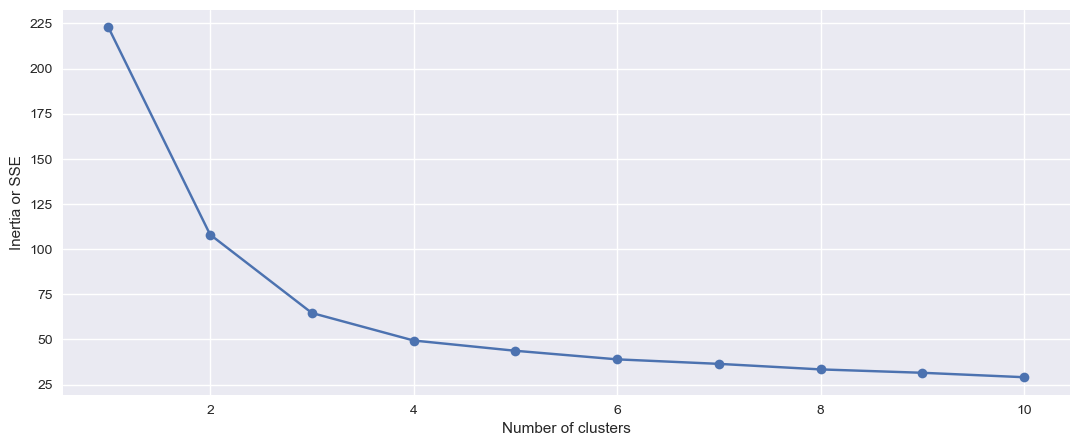

In [111]:
clusters = range(1, 11)
wcss = []
for cluster in clusters:
    model = KMeans(n_clusters=cluster, init='k-means++', random_state=42)
    model.fit(X)
    wcss.append(model.inertia_)
    print(cluster, "Clusters :", model.inertia_)

plt.style.use("seaborn")
plt.subplots(figsize=(13, 5))
plt.plot(clusters, wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia or SSE')

The optimum number of clusters is 2

## **Silhouette Score**

In [112]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.5168380203719032
For n_clusters = 3 The average silhouette_score is : 0.5214527450178313
For n_clusters = 4 The average silhouette_score is : 0.5173003088312471
For n_clusters = 5 The average silhouette_score is : 0.3778664757050564
For n_clusters = 6 The average silhouette_score is : 0.3735702335132275
For n_clusters = 7 The average silhouette_score is : 0.2826943998570449
For n_clusters = 8 The average silhouette_score is : 0.2905269621336746
For n_clusters = 9 The average silhouette_score is : 0.2674660965503647
For n_clusters = 10 The average silhouette_score is : 0.2715607847619858


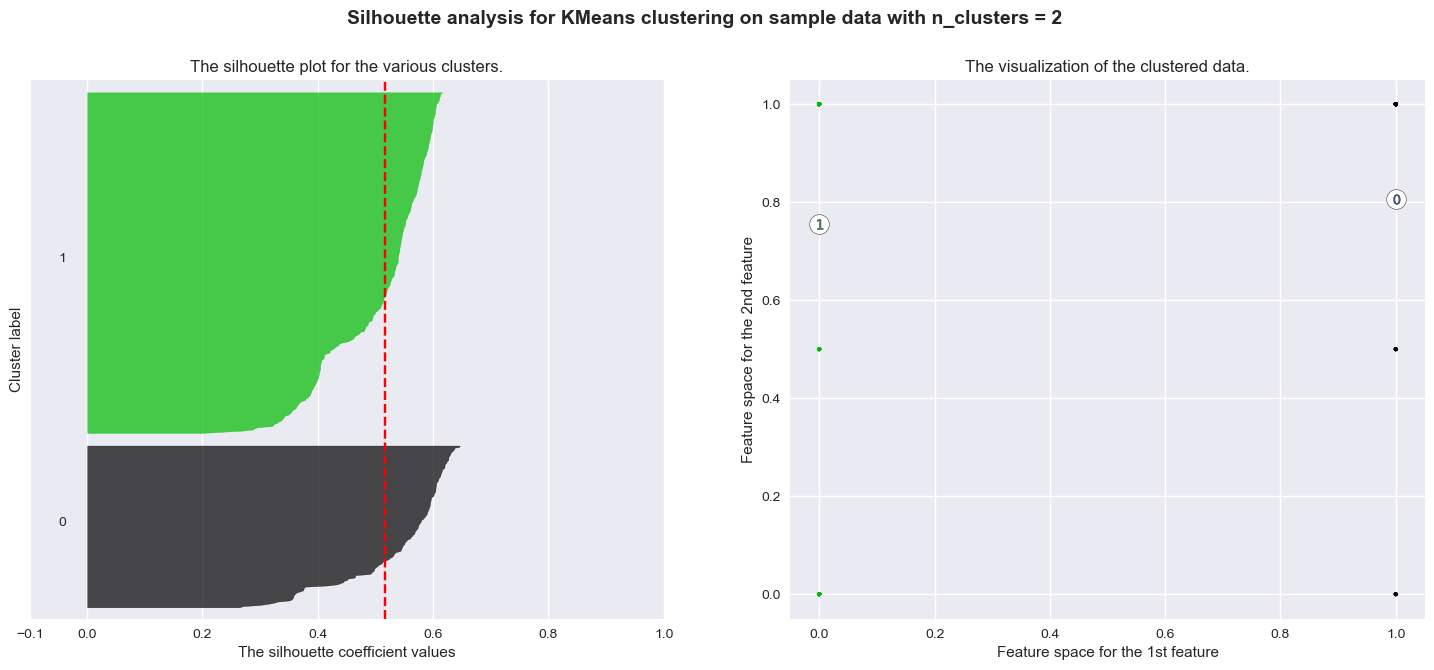

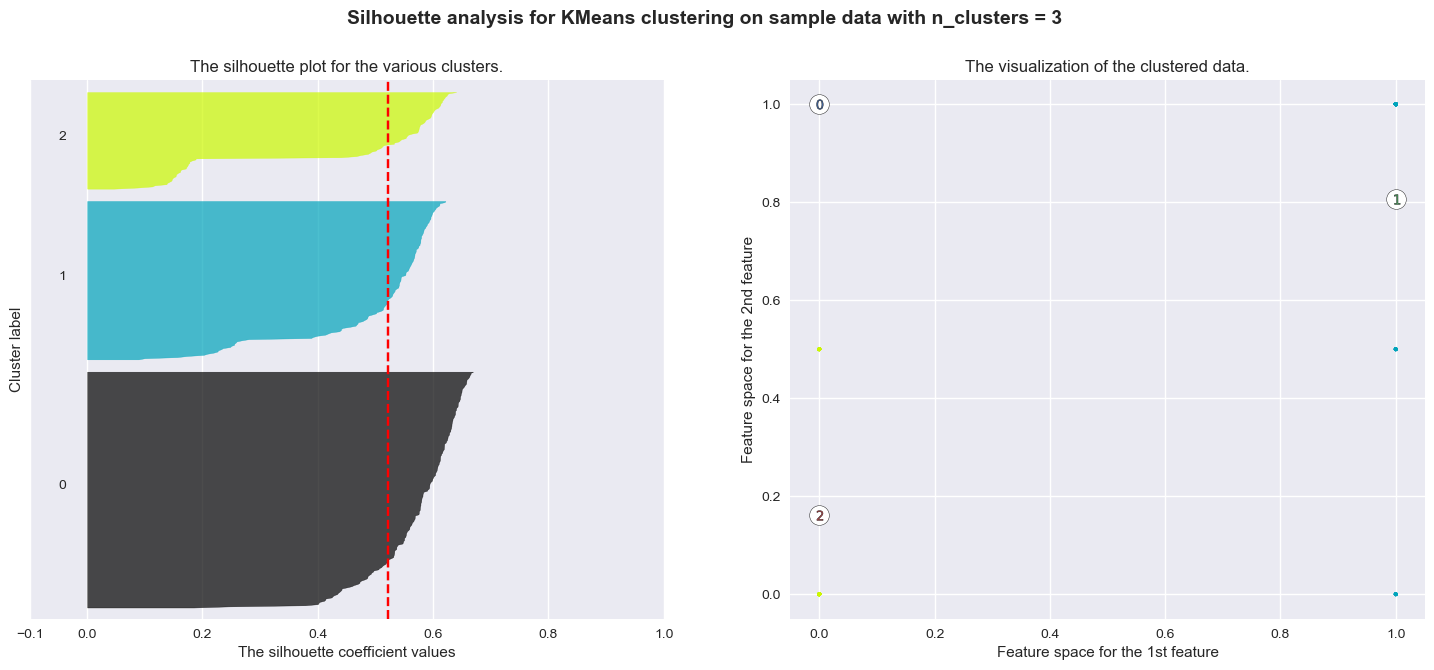

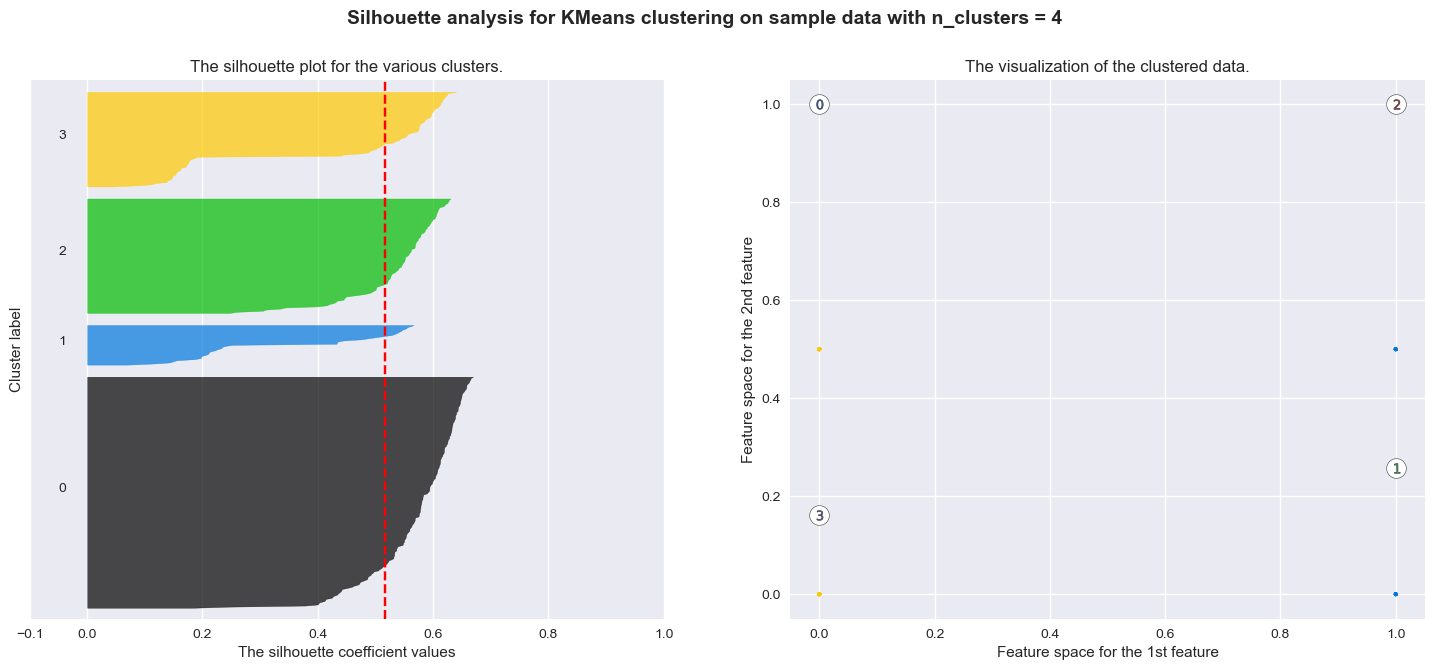

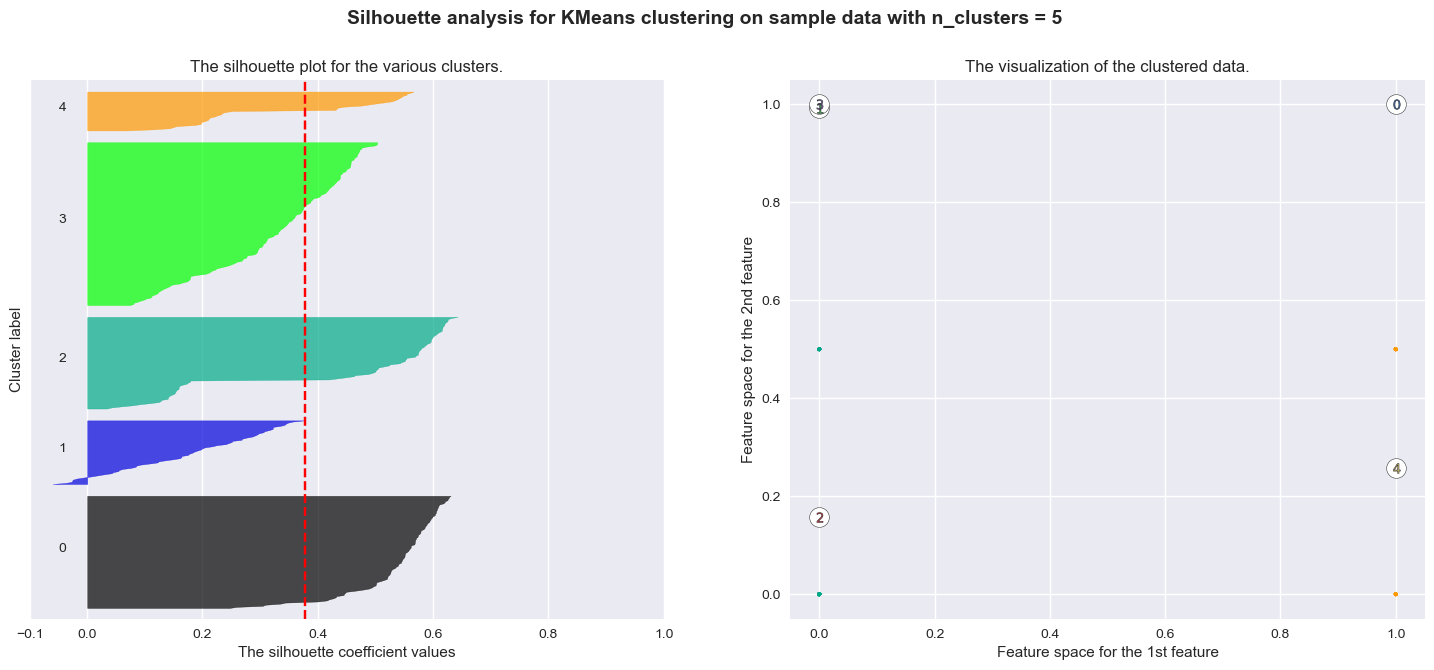

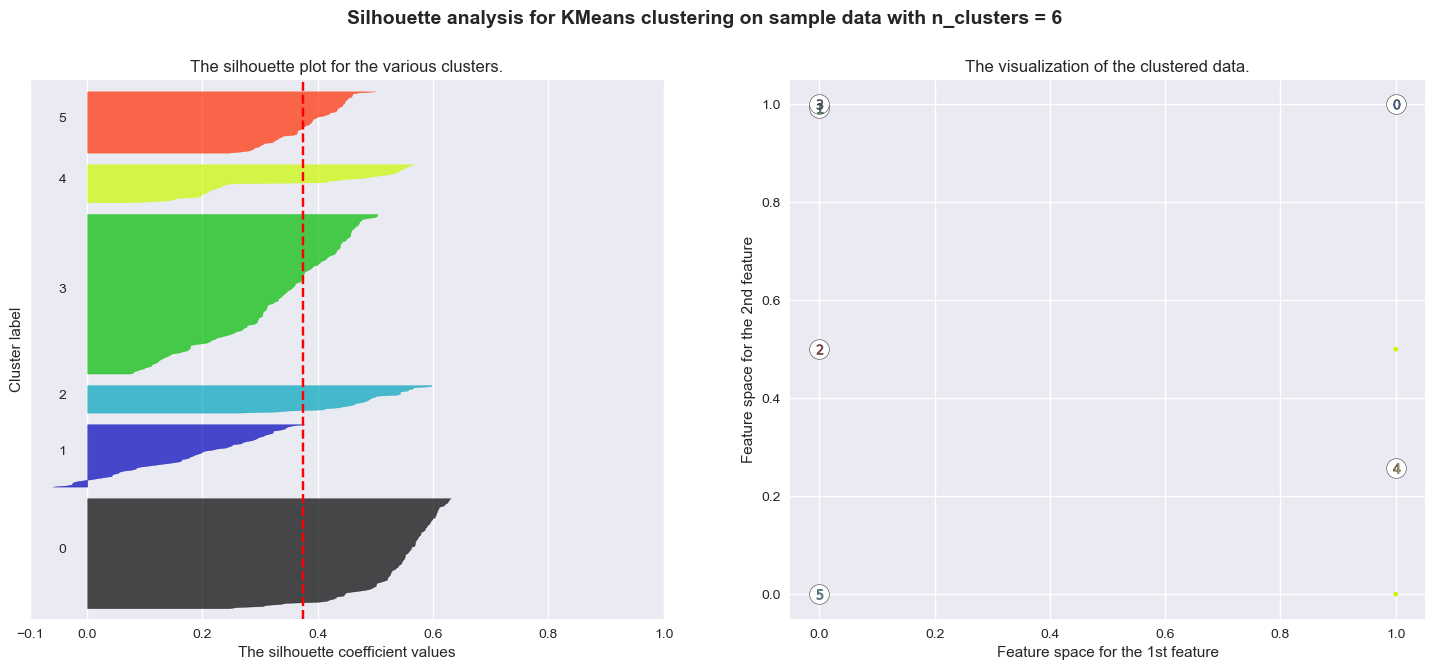

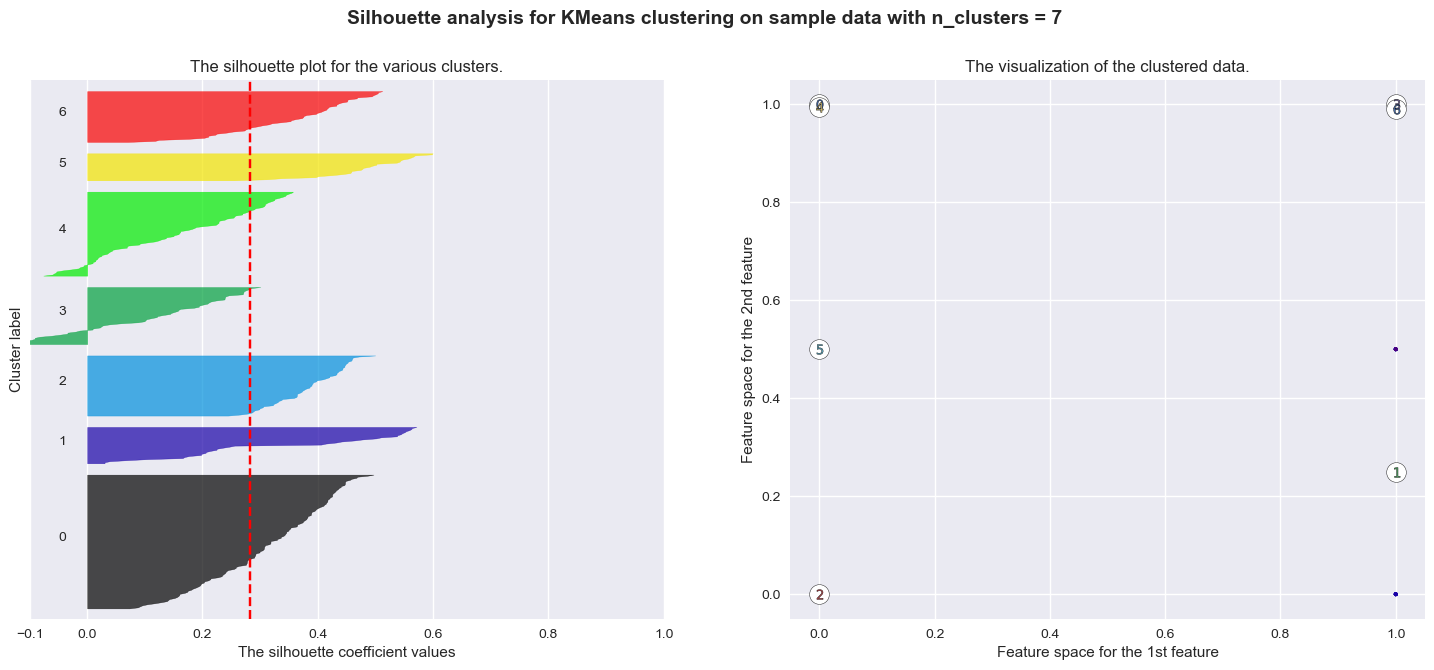

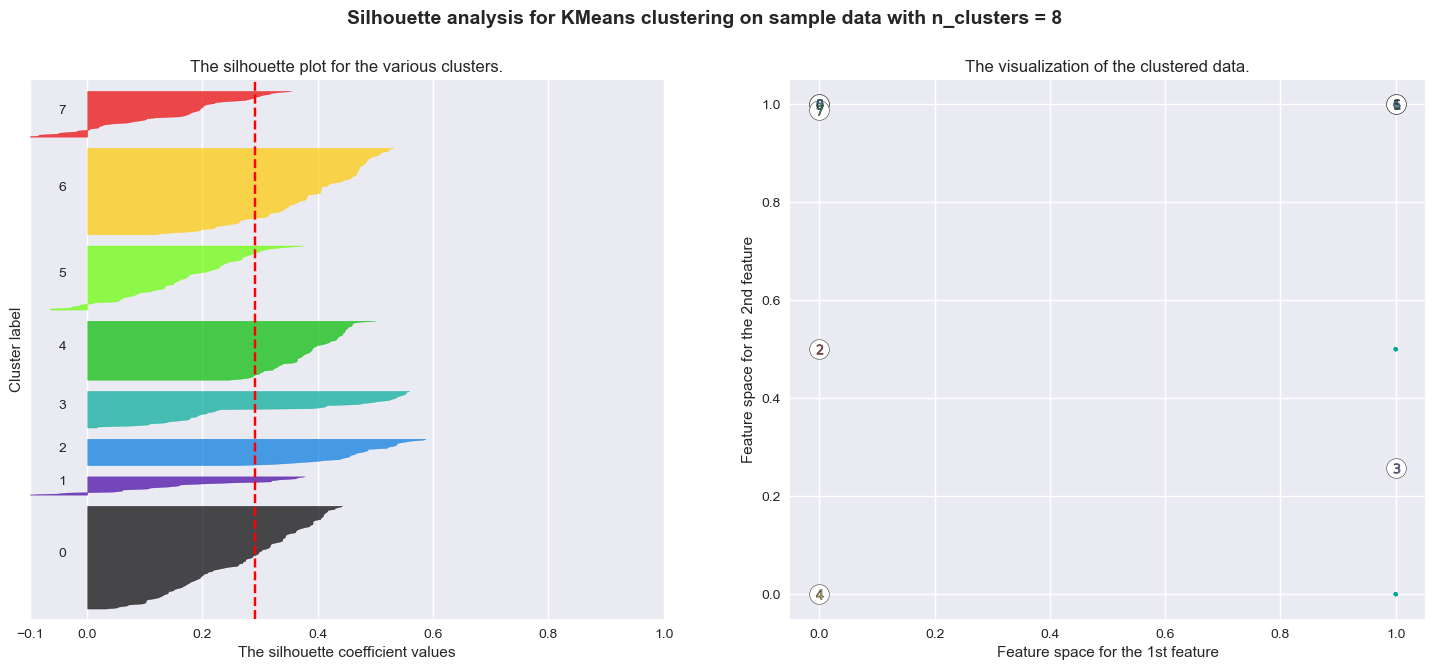

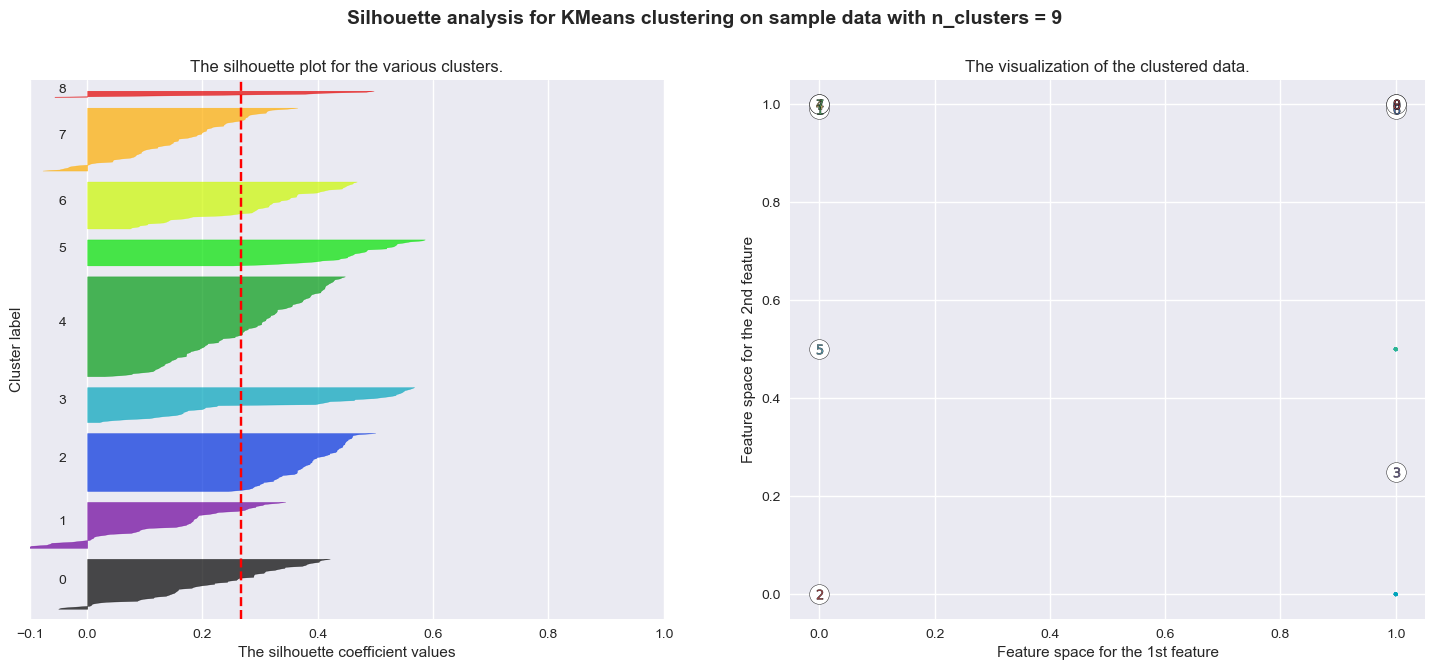

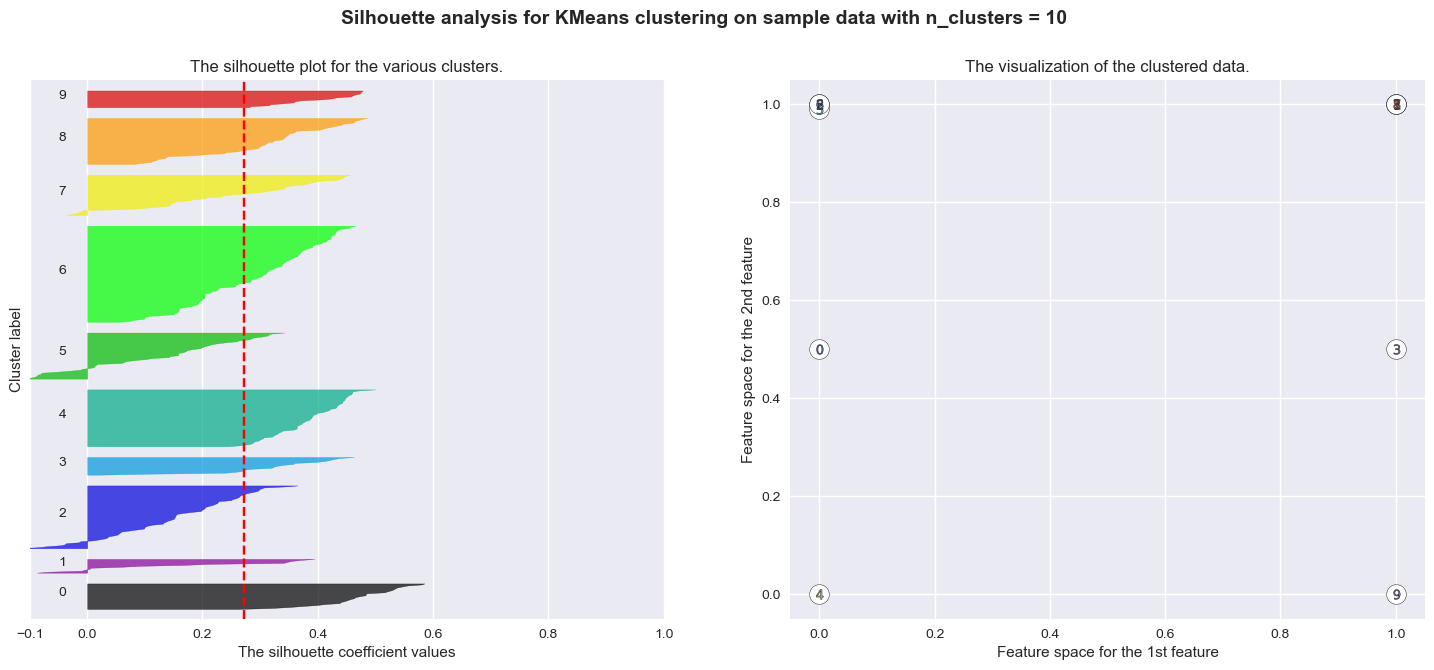

In [113]:
range_n_clusters = list(range(2, 11))

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

**The silhouette score for 2 number of clusters is the highest. So this method and elbow method gives 2 as the optimum number of clusters. So the final KMeans model can be created with 2 as the number of clusters.**

In [114]:
model = KMeans(n_clusters=2)
y_kmeans = model.fit_predict(X)
print(y_kmeans)

[1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0
 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1
 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0
 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


# **Hierarchical Clustering**

In [115]:
from scipy.cluster.hierarchy import dendrogram, linkage

## **Dendrogram Method**

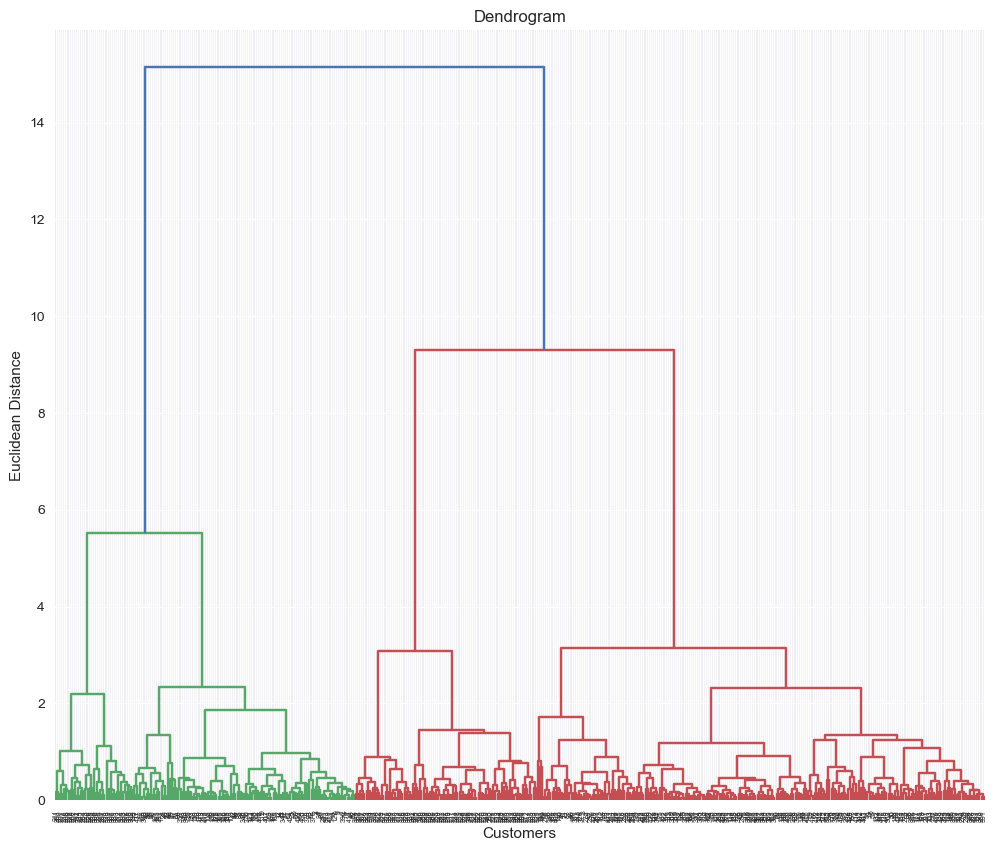

In [116]:
plt.figure(figsize=(12,10))
dendrogram(linkage(X, method = 'ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

**The optimum number of clusters is 2**

In [117]:
from sklearn.cluster import AgglomerativeClustering

## **Silhouette Score**

For n_clusters = 2 The average silhouette_score is : 0.5168380203719032
For n_clusters = 3 The average silhouette_score is : 0.5208209011787834
For n_clusters = 4 The average silhouette_score is : 0.516643276542635
For n_clusters = 5 The average silhouette_score is : 0.36978858505113193
For n_clusters = 6 The average silhouette_score is : 0.36493352620690855
For n_clusters = 7 The average silhouette_score is : 0.3111638050148966
For n_clusters = 8 The average silhouette_score is : 0.2619599651205389
For n_clusters = 9 The average silhouette_score is : 0.2657667080858029
For n_clusters = 10 The average silhouette_score is : 0.24447007323549935


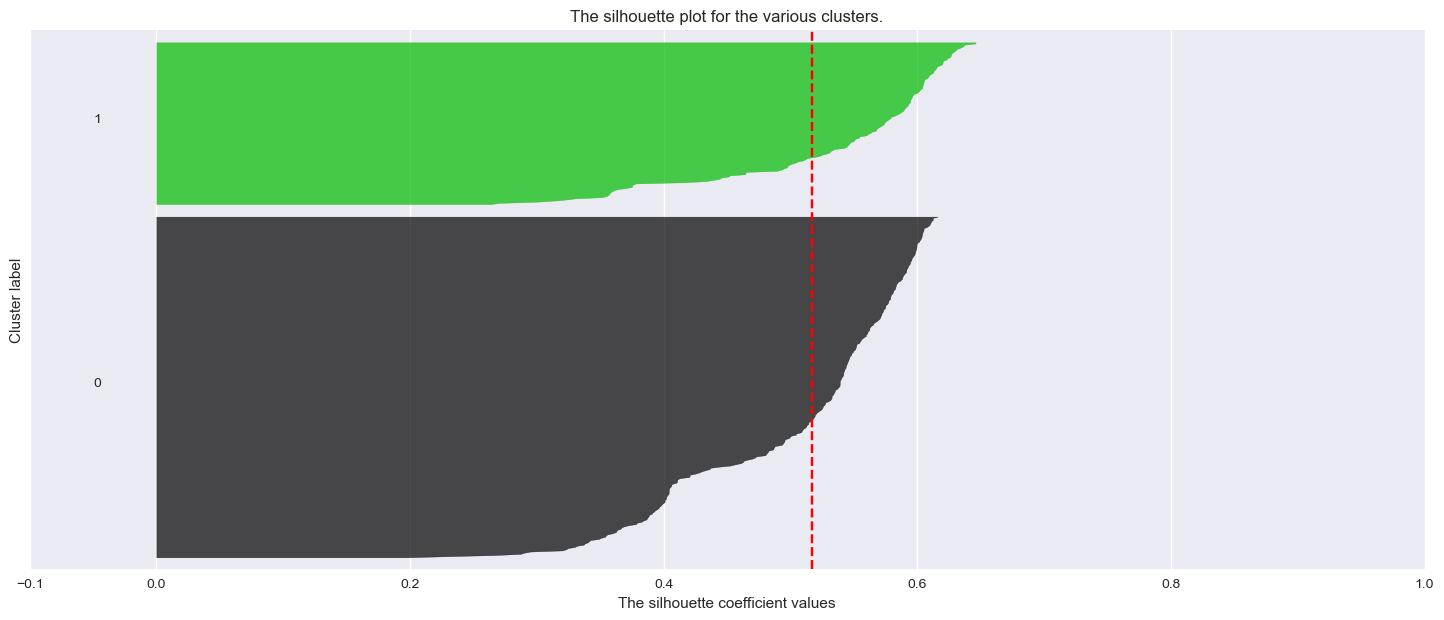

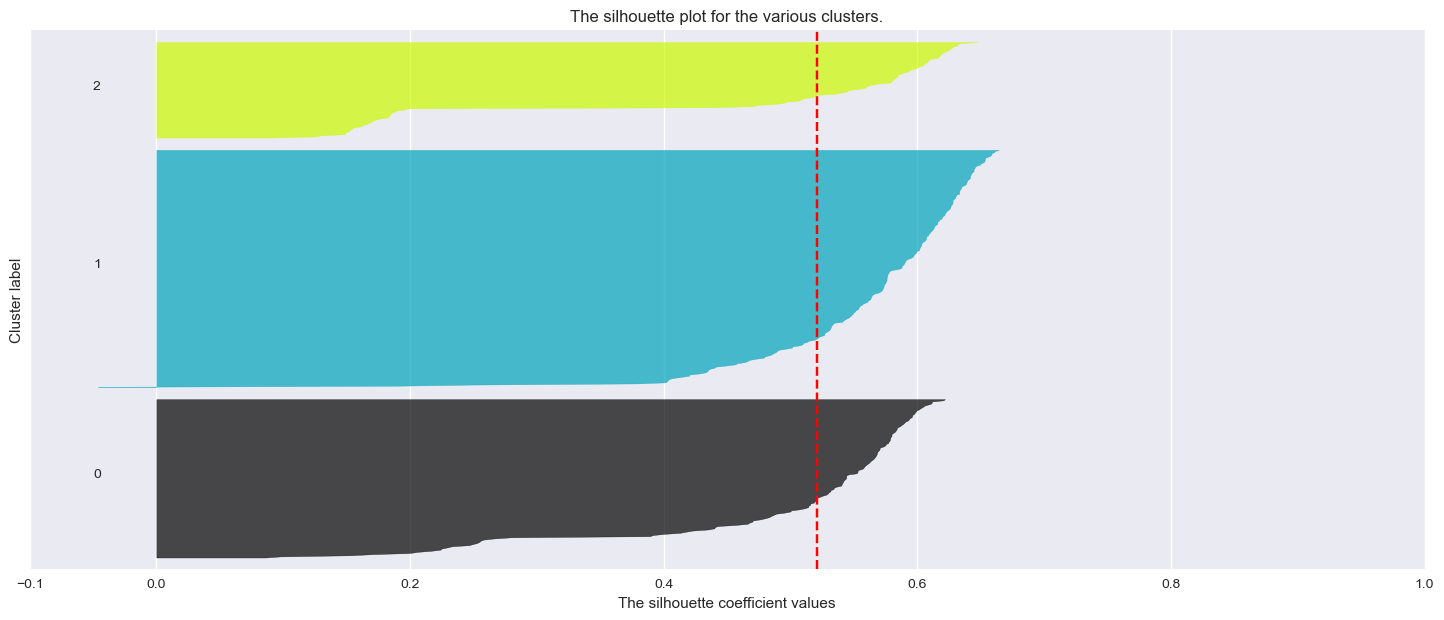

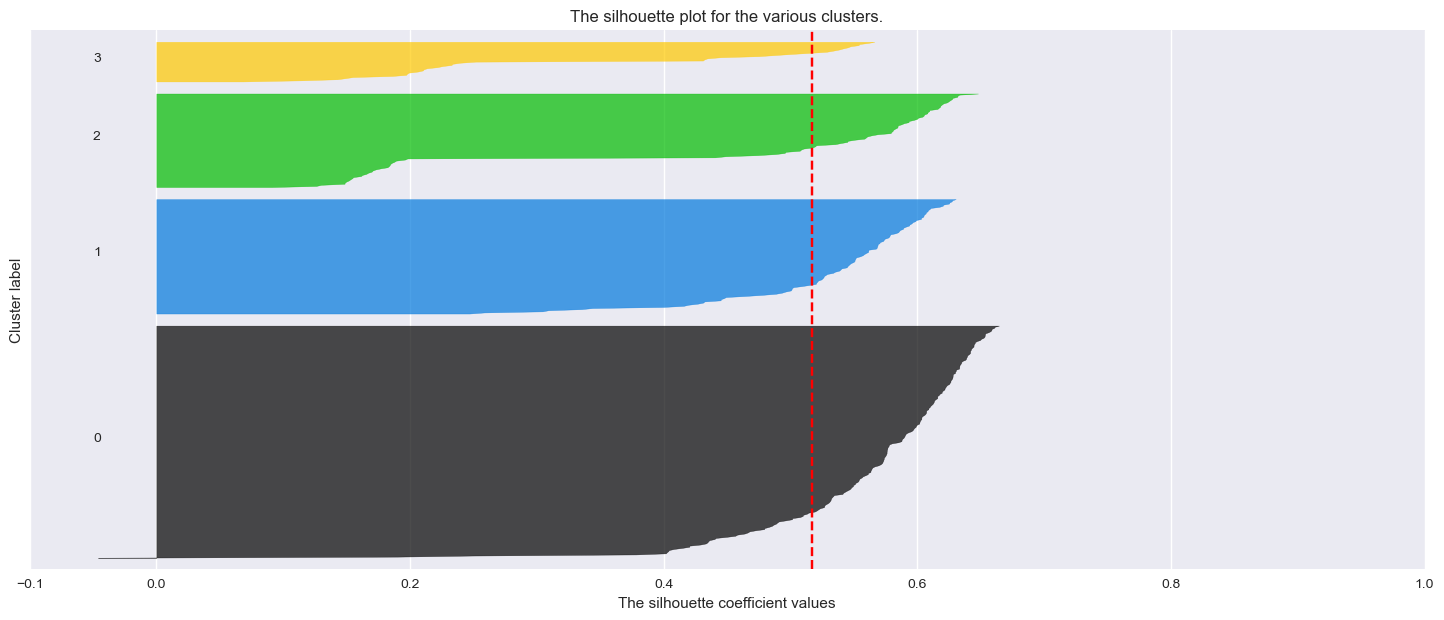

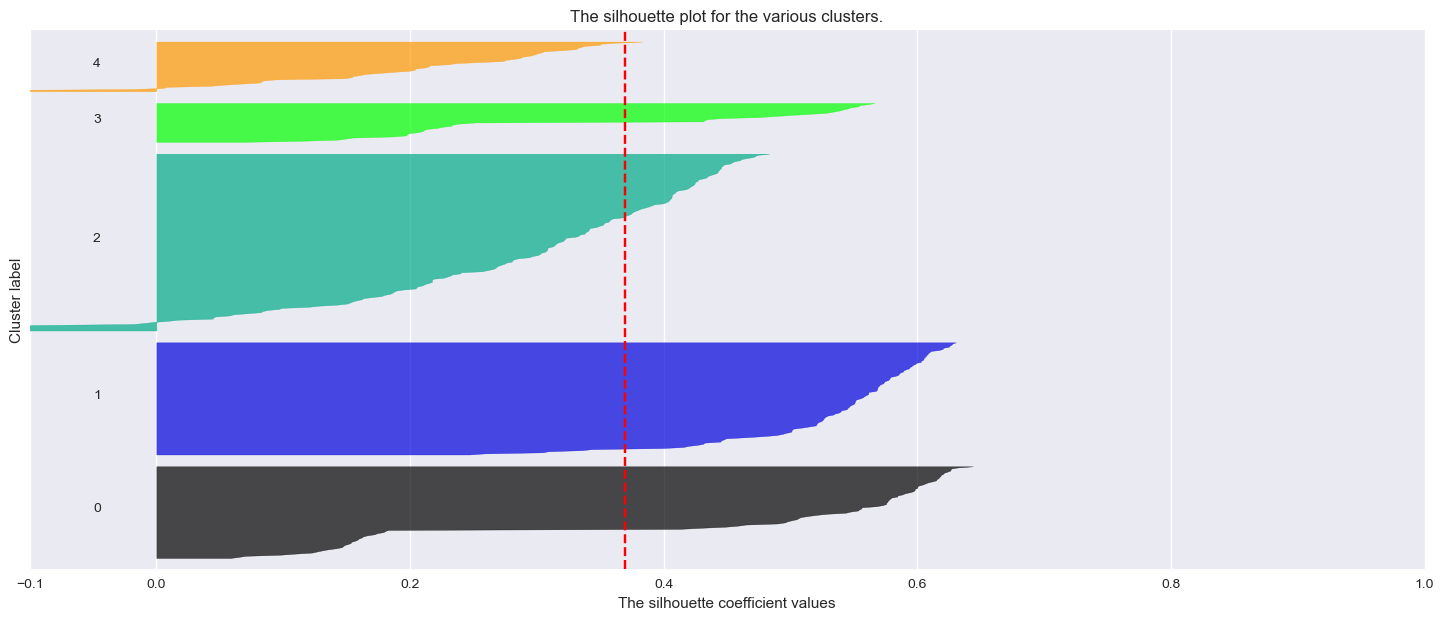

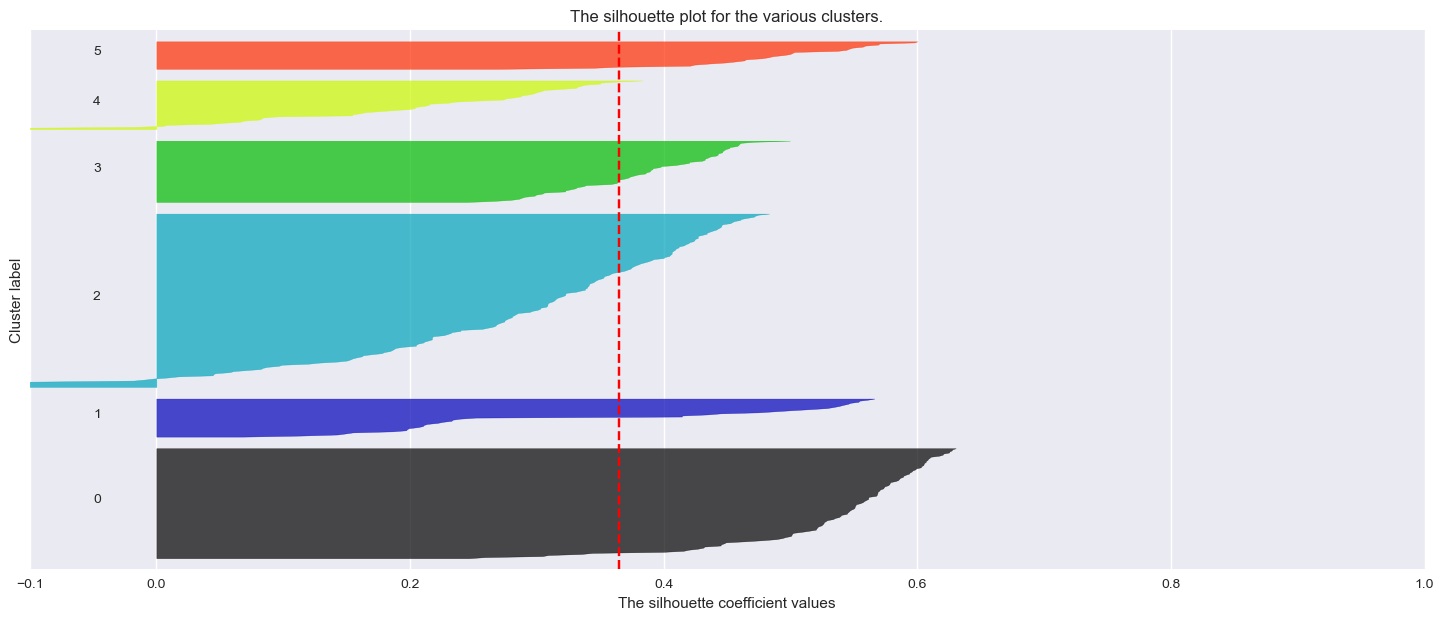

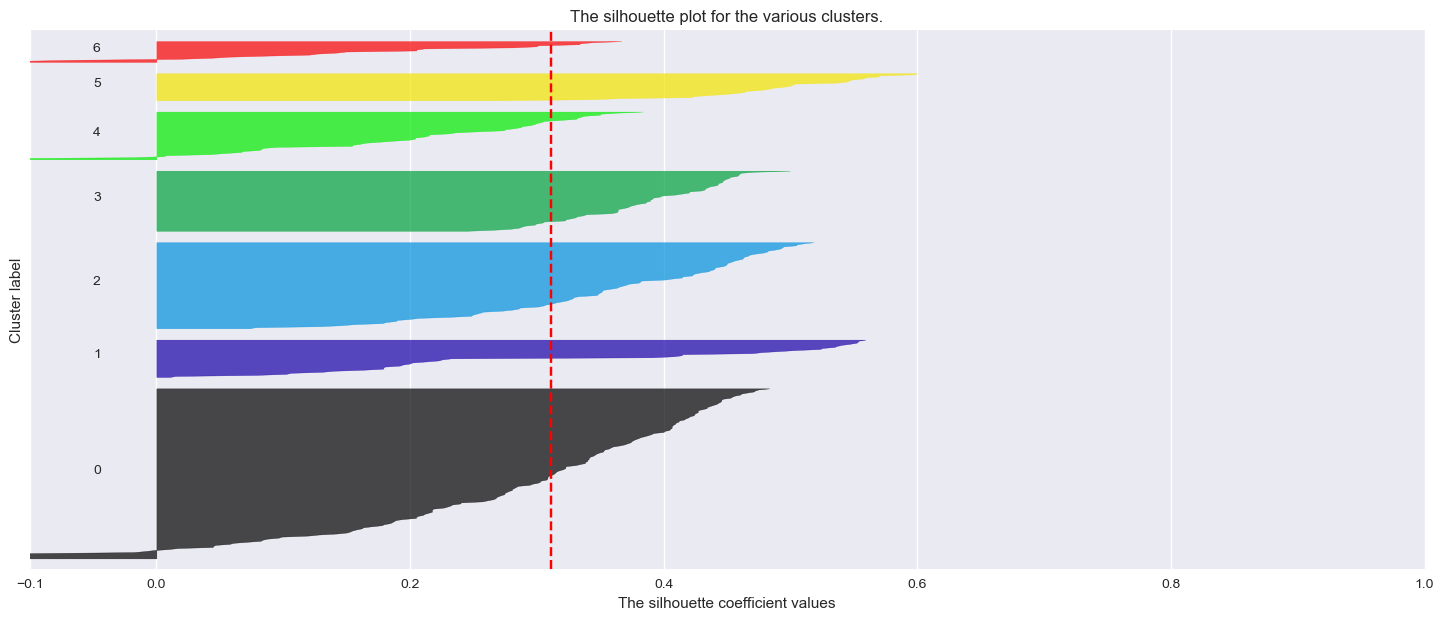

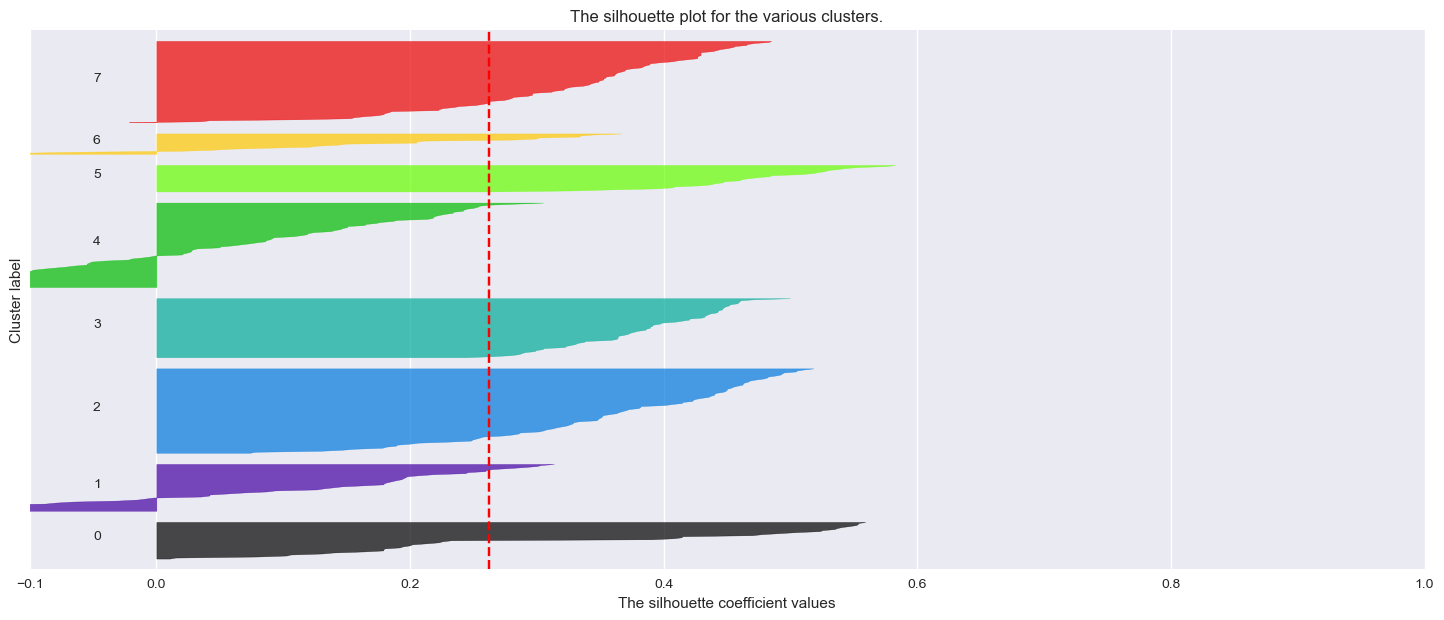

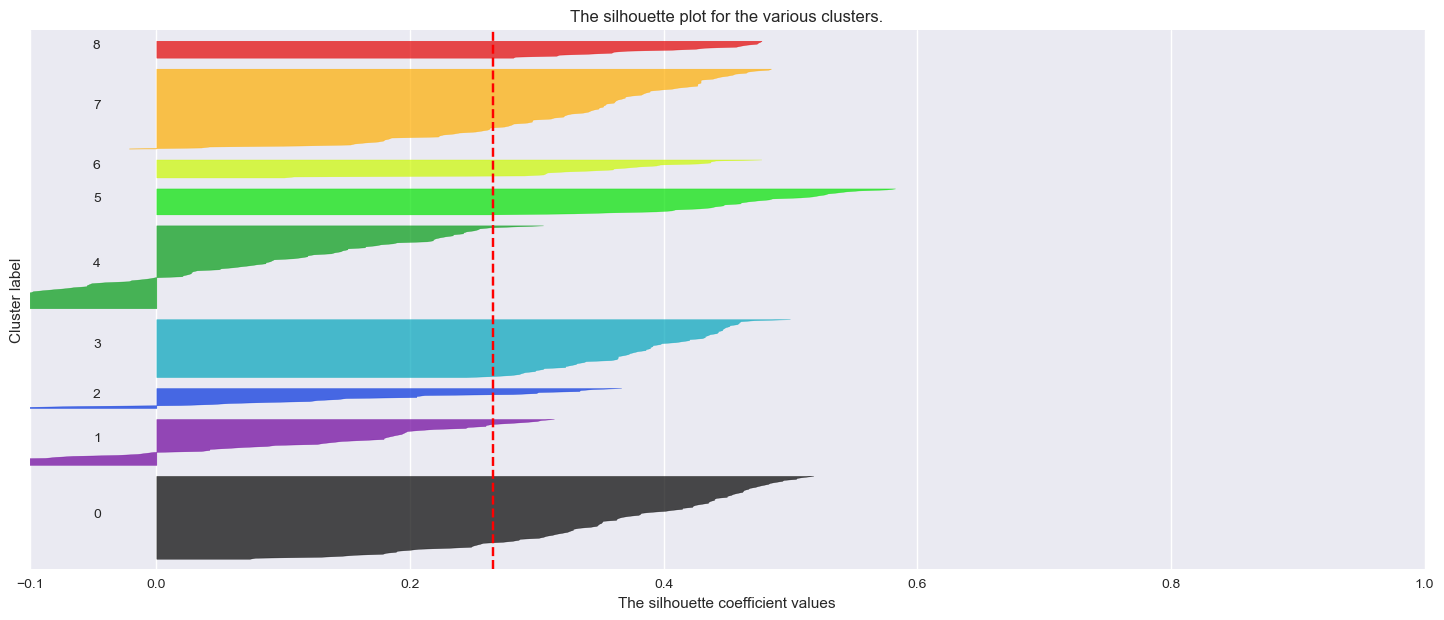

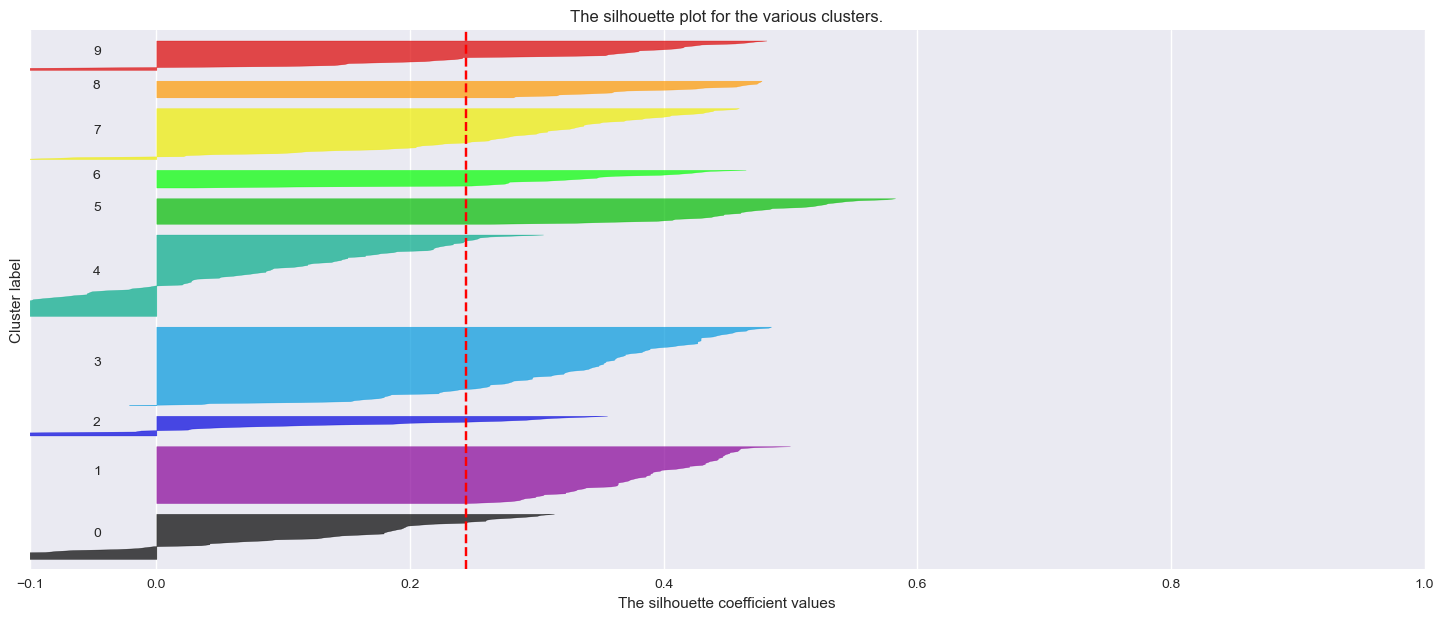

In [118]:
range_n_clusters = list(range(2, 11))

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward')
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

**From the dendrogram we get 2 as the optimum no.of clusters, and also the silhouette score for 2 number of clusters is the highest. So 2 is decided for the number of clusters for Agglomerative Clustering.**

In [119]:
hac = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hac = hac.fit_predict(X)

In [120]:
print(y_hac)

[1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0
 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1
 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0
 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


# **PCA**

In [122]:
from sklearn.decomposition import PCA

In [123]:
# again reading the dataset
data = pd.read_csv("Wholesale customers data.csv")

In [124]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


The dataset has 8 features, and we are going to reduce the dimension from 8 to 6.

In [135]:
data.shape

(440, 8)

In [131]:
from sklearn.preprocessing import StandardScaler

In [137]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(actual_X), columns=data.columns)
scaled_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [138]:
pca = PCA(n_components=6)
reduced_features = pca.fit_transform(scaled_X)

In [139]:
reduced_features.shape

(440, 6)

In [140]:
col_names = ["Feature " + str(i+1) for i in range(reduced_features.shape[1])]
reduced_data = pd.DataFrame(reduced_features, columns=col_names)
reduced_data.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6
0,0.843939,-0.515351,-0.767632,-0.044215,-0.446234,-0.939441
1,1.062676,-0.484601,-0.672975,0.401372,-0.130458,-0.867227
2,1.269141,0.682055,-0.664095,1.634953,-1.193813,-1.078442
3,-1.056782,0.610821,-0.505654,0.196005,0.457855,0.116959
4,0.634030,0.974199,-0.771209,0.186374,-0.813877,-1.505372


In [141]:
pca.explained_variance_ratio_

array([0.38750123, 0.22374588, 0.12647173, 0.09229904, 0.06957905,
       0.05741354])

In [142]:
index_names = ["PC-" + str(i+1) for i in range(reduced_features.shape[1])]
pd.DataFrame(pca.components_, columns=data.columns, index=index_names)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
PC-1,0.428292,0.024726,-0.025319,0.474410,0.536329,-0.029975,0.523906,0.164997
PC-2,-0.204699,0.043130,0.513445,0.205541,-0.008718,0.592745,-0.121083,0.533181
PC-3,-0.082980,-0.982501,-0.088951,0.025751,0.045314,0.122157,0.047481,-0.000930
PC-4,0.029644,0.077845,-0.798476,0.054022,-0.121586,0.161317,-0.151012,0.537558
PC-5,-0.036206,0.132509,-0.258117,-0.072086,0.111730,0.754212,0.176503,-0.544827
PC-6,-0.863507,0.089765,-0.147475,0.315933,0.213699,-0.194360,0.195754,-0.054533


In [143]:
# this is the feature reduced dataset
reduced_data

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6
0,0.843939,-0.515351,-0.767632,-0.044215,-0.446234,-0.939441
1,1.062676,-0.484601,-0.672975,0.401372,-0.130458,-0.867227
2,1.269141,0.682055,-0.664095,1.634953,-1.193813,-1.078442
3,-1.056782,0.610821,-0.505654,0.196005,0.457855,0.116959
4,0.634030,0.974199,-0.771209,0.186374,-0.813877,-1.505372
...,...,...,...,...,...,...
435,0.222884,2.480505,-0.360936,-0.601036,1.109212,0.364851
436,-1.290172,1.560397,-0.756171,-1.342401,-0.533462,-0.205789
437,3.865149,-0.479854,-0.525345,-0.687132,0.108968,0.280320
438,-1.097067,-0.069896,-0.630128,0.311821,-0.424792,0.335170


In [145]:
reduced_X = reduced_data.values
reduced_X

array([[ 0.84393893, -0.51535075, -0.76763222, -0.0442148 , -0.44623405,
        -0.93944129],
       [ 1.06267645, -0.48460126, -0.67297526,  0.40137178, -0.13045815,
        -0.86722684],
       [ 1.26914052,  0.68205455, -0.6640946 ,  1.63495276, -1.19381302,
        -1.07844165],
       ...,
       [ 3.86514909, -0.47985376, -0.52534452, -0.68713197,  0.10896788,
         0.28032041],
       [-1.09706738, -0.06989568, -0.63012755,  0.31182088, -0.424792  ,
         0.33517   ],
       [-1.16595067, -0.90215675, -0.59770486,  0.34265555, -0.0043876 ,
         0.50872064]])

## **KMeans**

In [144]:
from sklearn.cluster import KMeans

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


1 Clusters : 3368.6768698806645
2 Clusters : 2448.3551255594066
3 Clusters : 1999.56073890911
4 Clusters : 1688.465019318314
5 Clusters : 1406.3360093901576
6 Clusters : 1172.6366891288617
7 Clusters : 1026.5943808617192
8 Clusters : 904.5977799196019
9 Clusters : 828.8485302016643
10 Clusters : 755.5134835445097


Text(0, 0.5, 'Inertia or SSE')

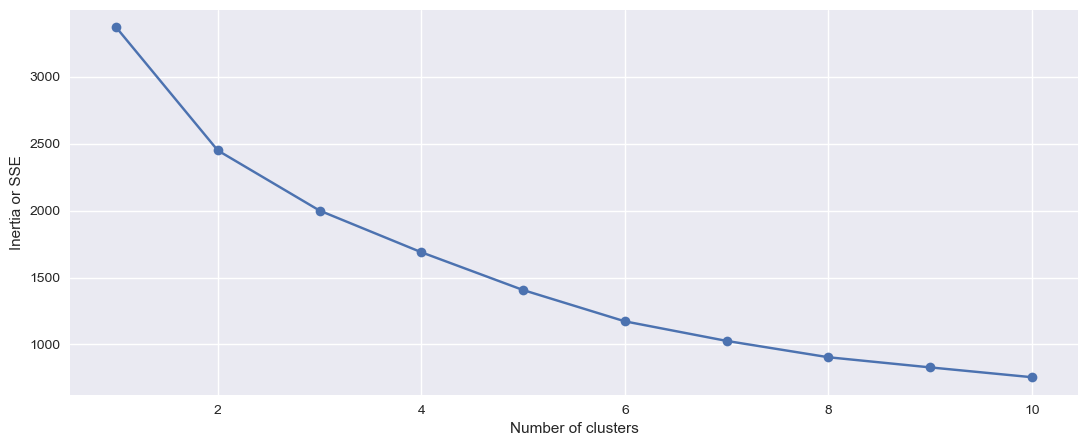

In [146]:
clusters = range(1, 11)
wcss = []
for cluster in clusters:
    model = KMeans(n_clusters=cluster, init='k-means++', random_state=42)
    model.fit(reduced_X)
    wcss.append(model.inertia_)
    print(cluster, "Clusters :", model.inertia_)

plt.style.use("seaborn")
plt.subplots(figsize=(13, 5))
plt.plot(clusters, wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia or SSE')

Here also we get 2 as the optimum number of clusters.

In [147]:
model = KMeans(n_clusters=2)
y_kmeans = model.fit_predict(reduced_X)
print(y_kmeans)

[1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0
 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0
 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


## **Hierarchical Clustering**

In [148]:
from scipy.cluster.hierarchy import dendrogram, linkage

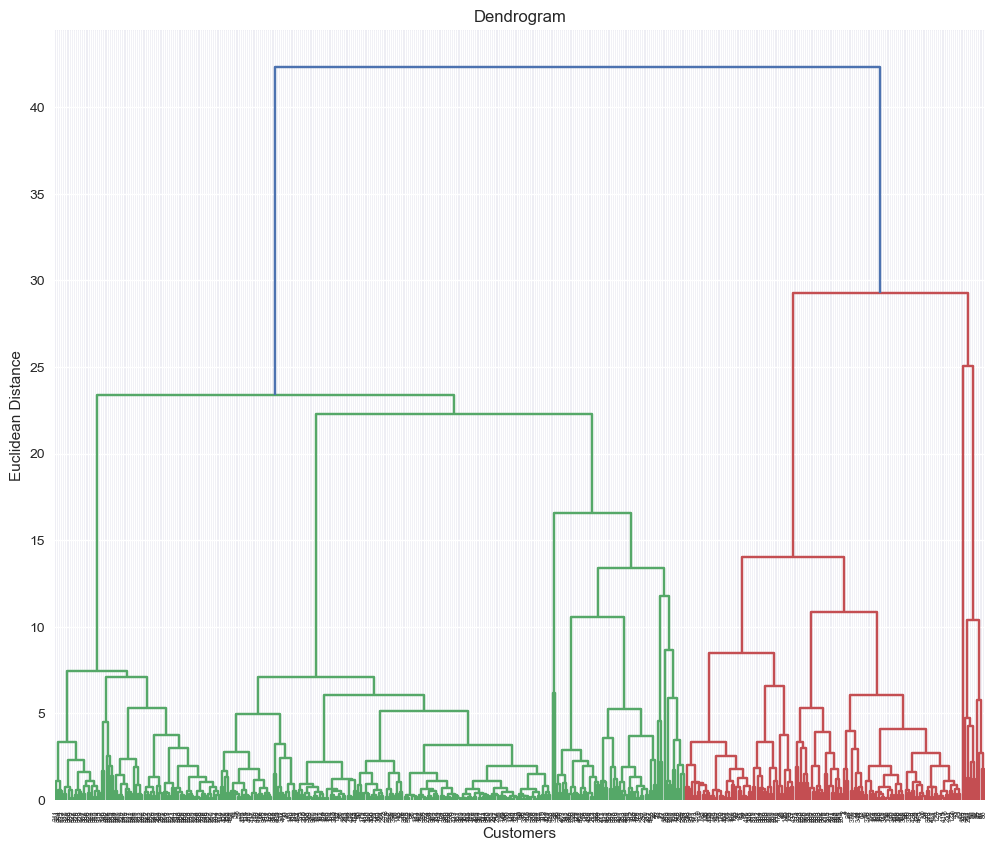

In [149]:
plt.figure(figsize=(12,10))
dendrogram(linkage(reduced_X, method = 'ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

Here also we get 2 as the optimum number of clusters. 

In [150]:
hac = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hac = hac.fit_predict(X)
print(y_hac)

[1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0
 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1
 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0
 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
